In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,id;q=0.8,ms;q=0.7,ta;q=0.6" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.441449393.1530659697" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-data-sets/8782/44566/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589532925&Signature=Jlv6LDLmAEzliTWi82D5ntWhgZkju8Cza3snp5R0mofAJLliyMj%2F1UeK%2FleprQ42Wuu1gVO86ytcF6gUwMSXckjv2%2FydjWqhtHh5qHjv9jygn9x6kPac8%2BLt6qmf8hocJhGyuHtITEJSTnNaWXEMJ0Bm4S63wtcbk2019%2Ba5aCWF%2FkKT4DA5t76a%2FDRNY76k8CzQxCZMh4DLX0K3NBBa9vYfcmtBob2BSuog5jCtKDh5M%2B34ZUkyJGsGNKDdmeehrsfwQfx%2BJH1B4o2T7etFGi6QztY%2BoWIa3Kn%2Fx1z67hH9PCzeZkN%2FQ4MCGpppzM6ZBBJHfDJM2RflRpdit9bqiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dflowers-recognition.zip" -c -O 'flowers-recognition.zip'

--2020-05-12 08:55:37--  https://storage.googleapis.com/kaggle-data-sets/8782/44566/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589532925&Signature=Jlv6LDLmAEzliTWi82D5ntWhgZkju8Cza3snp5R0mofAJLliyMj%2F1UeK%2FleprQ42Wuu1gVO86ytcF6gUwMSXckjv2%2FydjWqhtHh5qHjv9jygn9x6kPac8%2BLt6qmf8hocJhGyuHtITEJSTnNaWXEMJ0Bm4S63wtcbk2019%2Ba5aCWF%2FkKT4DA5t76a%2FDRNY76k8CzQxCZMh4DLX0K3NBBa9vYfcmtBob2BSuog5jCtKDh5M%2B34ZUkyJGsGNKDdmeehrsfwQfx%2BJH1B4o2T7etFGi6QztY%2BoWIa3Kn%2Fx1z67hH9PCzeZkN%2FQ4MCGpppzM6ZBBJHfDJM2RflRpdit9bqiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dflowers-recognition.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 2607:f8b0:4005:802::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 471666316 (450M) [application/zip]
Saving to: ‘flowers-recognition.zip’

flowers-recognition 100%[========

In [0]:
%matplotlib inline
from fastai2.vision.all import *

In [0]:
import os
os.listdir()

['Untitled.ipynb', 'flowers-recognition.zip', 'flowers', '.ipynb_checkpoints']

In [0]:
path = Path('flowers/')

In [0]:
path.ls()

(#6) [Path('flowers/rose'),Path('flowers/sunflower'),Path('flowers/dandelion'),Path('flowers/flowers'),Path('flowers/tulip'),Path('flowers/daisy')]

In [0]:
path_img = Path('flowers/flowers/')

In [0]:
path_img.ls()

(#5) [Path('flowers/flowers/rose'),Path('flowers/flowers/sunflower'),Path('flowers/flowers/dandelion'),Path('flowers/flowers/tulip'),Path('flowers/flowers/daisy')]

In [0]:
fnames = get_image_files(path_img)

In [0]:
len(fnames)

4323

In [0]:
fnames[0]

Path('flowers/flowers/rose/15674450867_0ced942941_n.jpg')

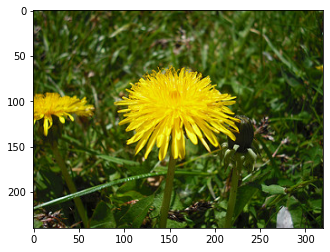

In [0]:
plt.imshow(plt.imread(str(fnames[2000])))

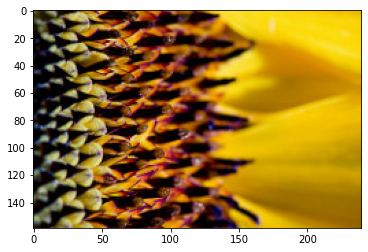

In [0]:
plt.imshow(plt.imread(str(fnames[1000])))

In [0]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    
    splitter=RandomSplitter(valid_pct=0.2,seed=2),
    
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224,max_rotate=25,max_lighting=0.4,max_zoom=0.4)

)

In [0]:
dls = data.dataloaders(path_img)

In [0]:
data.summary(path_img)

Setting-up type transforms pipelines
Found 4323 items
2 datasets of sizes 3459,864
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      flowers/flowers/rose/5002446908_150a969334_n.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=240x159
  Pipeline: parent_label -> Categorize
    starting from
      flowers/flowers/rose/5002446908_150a969334_n.jpg
    applying parent_label gives
      rose
    applying Categorize gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=240x159, TensorCategory(2))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=240x159, TensorCategory(2))
    applying Resize give

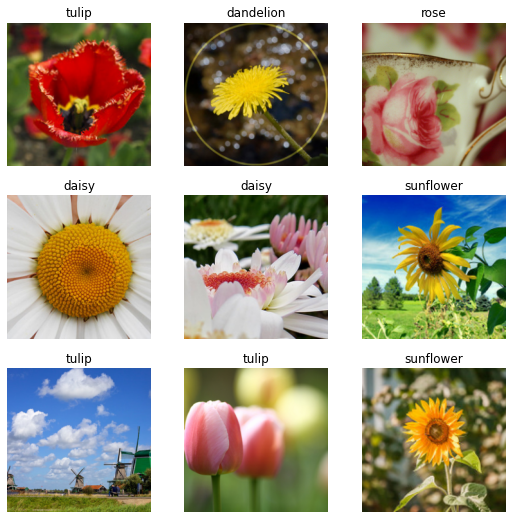

In [0]:
dls.valid.show_batch()

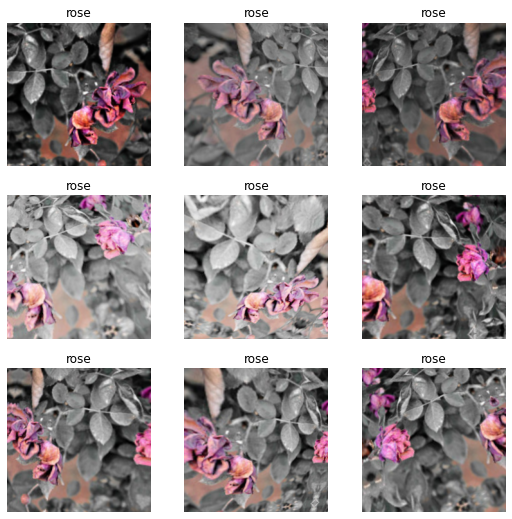

In [0]:
dls.train.show_batch(unique=True)

In [0]:
learn = cnn_learner(dls,resnet34,metrics=[error_rate,accuracy])

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.001737800776027143)

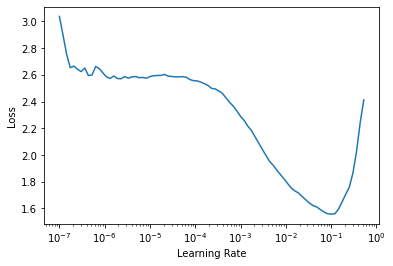

In [0]:
learn.lr_find()

In [0]:
learn.fine_tune(4,base_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.228703,0.399346,0.131944,0.868056,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.550015,0.277419,0.092593,0.907407,00:16
1,0.386493,0.208477,0.072917,0.927083,00:16
2,0.288204,0.181507,0.067130,0.932870,00:16
3,0.218305,0.178453,0.057870,0.942130,00:16


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

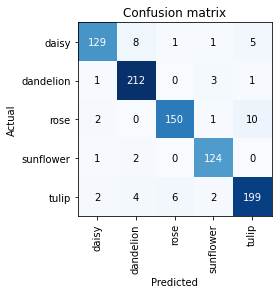

In [0]:
interp.plot_confusion_matrix()

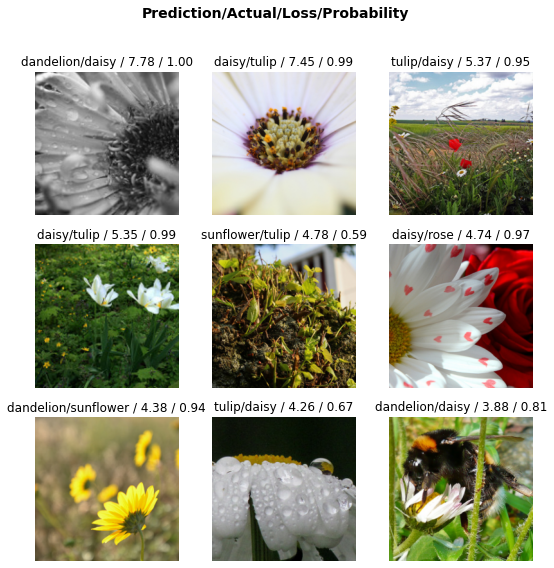

In [0]:
interp.plot_top_losses(9)